<center><h1>Joshua_Payapulli_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>
<center><font size="3">Name: Joshua Payapulli</font></center>
<center><font size="3">Github: Payapulli</font></center>
<center><font size="3">USC ID: 3751786221</font></center>

### (a) Download Data

Package imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from numpy.linalg import pinv
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.covariance import EmpiricalCovariance
from prettytable import PrettyTable

Get the Vertebral Column Data Set

In [2]:
column_names = ['PI', 'PT', 'LL', 'SS', 'PR', 'DS', 'class']
df = pd.read_csv('../../data/vertebral_column_data/column_2C.dat', delim_whitespace=True, names=column_names)
print(df)

        PI     PT     LL     SS      PR     DS class
0    63.03  22.55  39.61  40.48   98.67  -0.25    AB
1    39.06  10.06  25.02  29.00  114.41   4.56    AB
2    68.83  22.22  50.09  46.61  105.99  -3.53    AB
3    69.30  24.65  44.31  44.64  101.87  11.21    AB
4    49.71   9.65  28.32  40.06  108.17   7.92    AB
..     ...    ...    ...    ...     ...    ...   ...
305  47.90  13.62  36.00  34.29  117.45  -4.25    NO
306  53.94  20.72  29.22  33.22  114.37  -0.42    NO
307  61.45  22.69  46.17  38.75  125.67  -2.71    NO
308  45.25   8.69  41.58  36.56  118.55   0.21    NO
309  33.84   5.07  36.64  28.77  123.95  -0.20    NO

[310 rows x 7 columns]


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

['PI', 'PT', 'LL', 'SS', 'PR', 'DS']


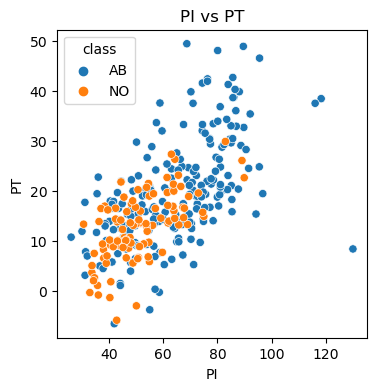

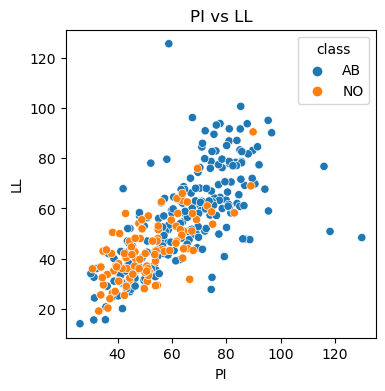

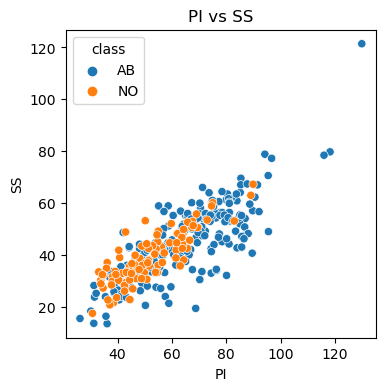

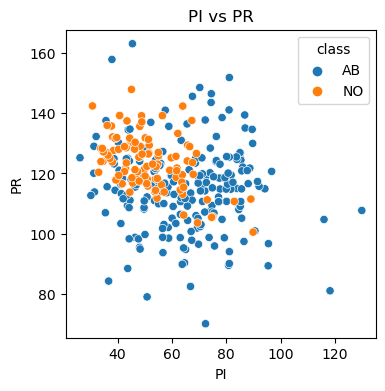

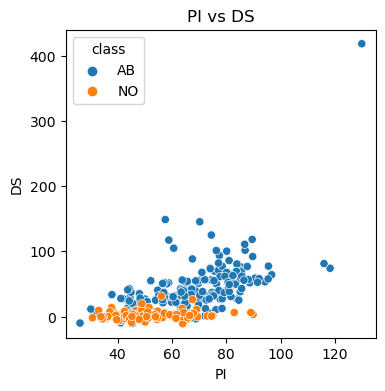

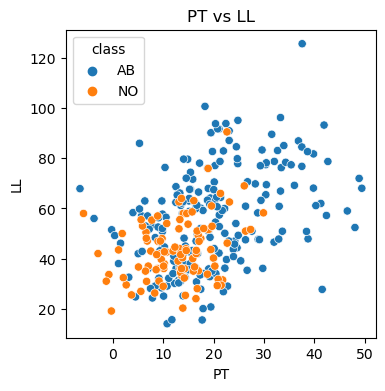

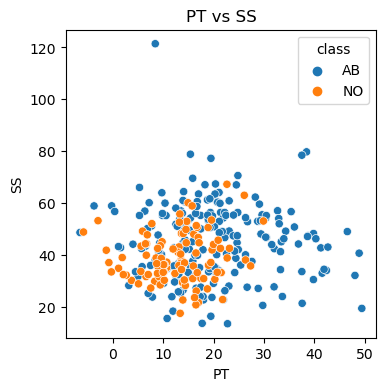

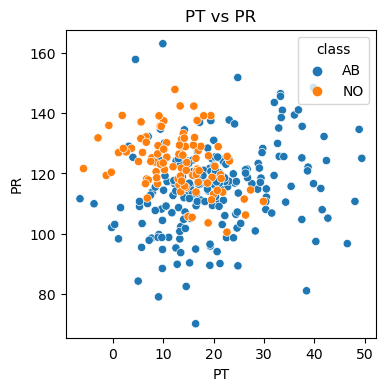

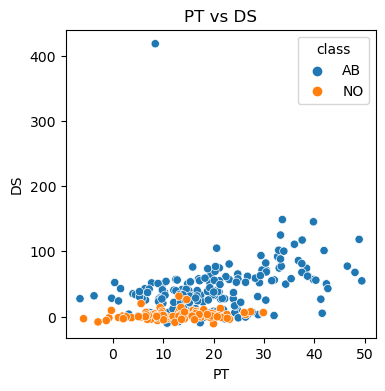

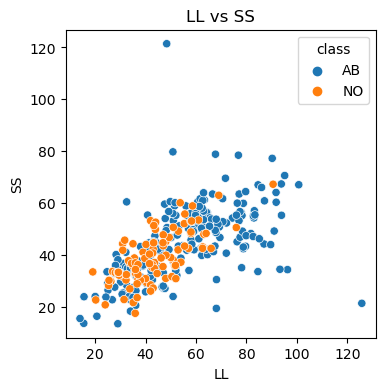

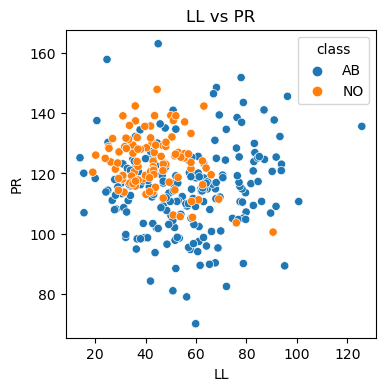

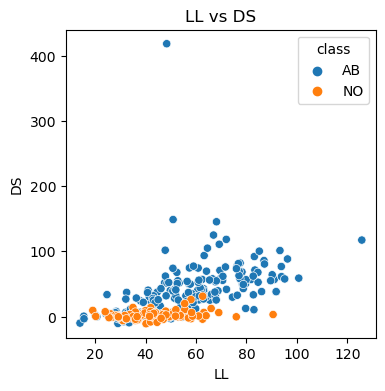

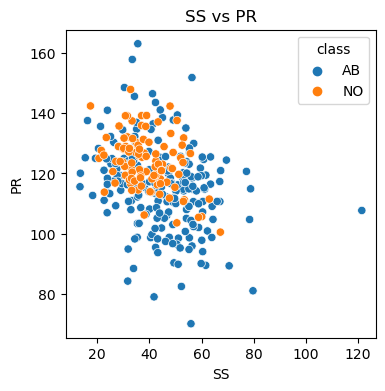

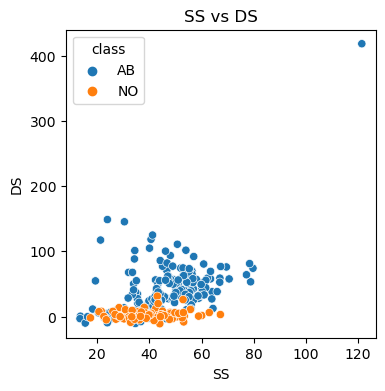

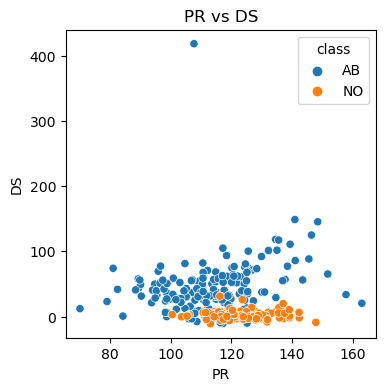

In [3]:
ind_vars = column_names[:-1]
print(ind_vars)

for i in range(len(ind_vars)):
    for j in range(i+1, len(ind_vars)):
        x1, x2 = ind_vars[i], ind_vars [j]
        
        plt.figure(figsize=(4, 4))
        sns.scatterplot(x=x1, y=x2, hue='class', data=df)
        plt.title(f'{x1} vs {x2}')
        plt.show()

#### ii. Boxplots

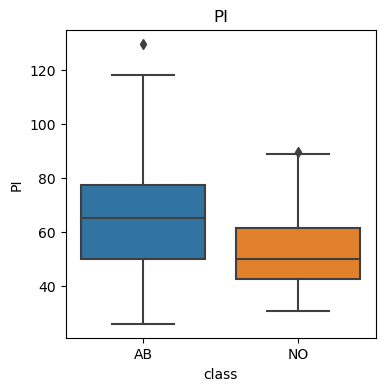

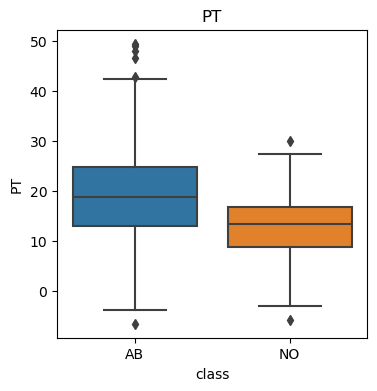

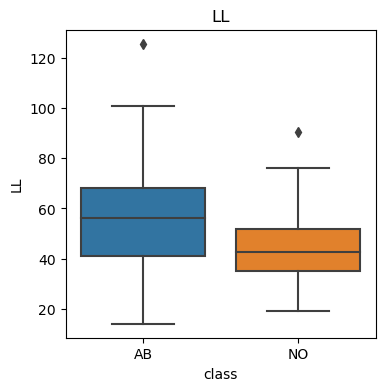

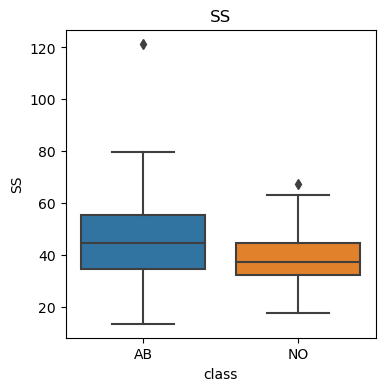

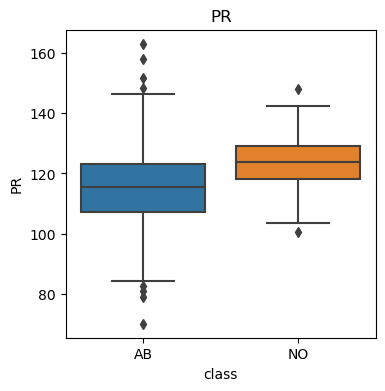

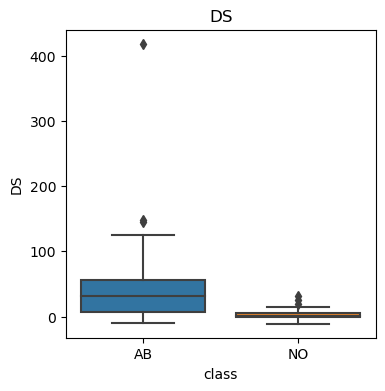

In [4]:
for x in ind_vars:
    plt.figure(figsize=(4, 4))
    sns.boxplot(x='class', y=x, data=df)
    plt.title(f'{x}')
    plt.show()

#### iii. Split Data Set

In [5]:
len_class_0 = len(df[df['class'] == 'NO'])
len_class_1 = len(df[df['class'] == 'AB'])
class0_indices = np.arange(70, len_class_0) 
class1_indices = np.arange(140, len_class_1)

tr_df = pd.concat([df[df['class'] == 'NO'].iloc[:70], 
                   df[df['class'] == 'AB'].iloc[:140]], ignore_index=True)
te_df = pd.concat([df[df['class'] == 'NO'].iloc[class0_indices], 
                     df[df['class'] == 'AB'].iloc[class1_indices]], 
                    ignore_index=True)

print(tr_df)
print(te_df)

        PI     PT     LL     SS      PR     DS class
0    38.51  16.96  35.11  21.54  127.63   7.99    NO
1    54.92  18.97  51.60  35.95  125.85   2.00    NO
2    44.36   8.95  46.90  35.42  129.22   4.99    NO
3    48.32  17.45  48.00  30.87  128.98  -0.91    NO
4    45.70  10.66  42.58  35.04  130.18  -3.39    NO
..     ...    ...    ...    ...     ...    ...   ...
205  77.12  30.35  77.48  46.77  110.61  82.09    AB
206  88.02  39.84  81.77  48.18  116.60  56.77    AB
207  83.40  34.31  78.42  49.09  110.47  49.67    AB
208  72.05  24.70  79.87  47.35  107.17  56.43    AB
209  85.10  21.07  91.73  64.03  109.06  38.03    AB

[210 rows x 7 columns]
       PI     PT     LL     SS      PR      DS class
0   50.09  13.43  34.46  36.66  119.13    3.09    NO
1   64.26  14.50  43.90  49.76  115.39    5.95    NO
2   53.68  13.45  41.58  40.24  113.91    2.74    NO
3   49.00  13.11  51.87  35.88  126.40    0.54    NO
4   59.17  14.56  43.20  44.60  121.04    2.83    NO
..    ...    ...    ..

### (c) Classification

#### i. Euclidean Metric

In [6]:
# partition x and y data
tr_x = tr_df.drop('class', axis=1).to_numpy()
tr_y = tr_df['class'].to_numpy()

te_x = te_df.drop('class', axis=1).to_numpy()
te_y = te_df['class'].to_numpy()

tr_accuracy = []
te_accuracy = []

for k in range(209, -1, -3):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

    # train knn classifier
    knn.fit(tr_x, tr_y)

    # calculate training accuracy
    tr_pred_y = knn.predict(tr_x)
    tr_accuracy.append(accuracy_score(tr_y, tr_pred_y))

    # calculate accuracy and add to list
    te_pred_y = knn.predict(te_x)
    te_accuracy.append(accuracy_score(te_y, te_pred_y))

#### ii. Test Data

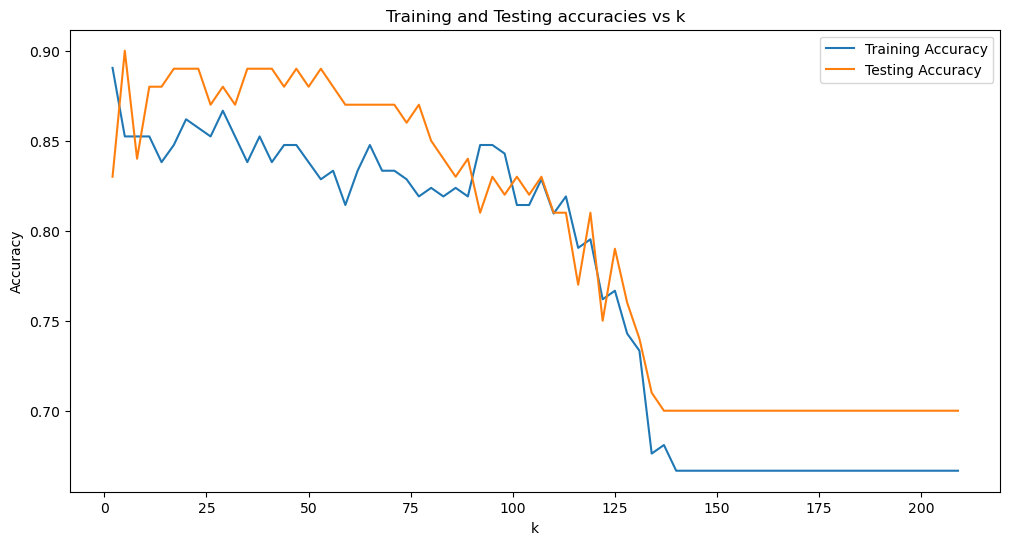

In [7]:
plt.figure(figsize=(12,6))
plt.plot(range(209, -1, -3), tr_accuracy, label='Training Accuracy')
plt.plot(range(209, -1, -3), te_accuracy, label='Testing Accuracy')
plt.xlabel('k')
plt.xticks(range(0, 210, 25))
plt.ylabel('Accuracy')
plt.title('Training and Testing accuracies vs k')
plt.legend()
plt.show()

## Finding "k*"

We want to find k* such that k* is the value of k with the highest test accuracy. From the graph we see that our highest accuracies like in the k = 0-50 range. Lets go through these values again with a smaller increment to more clearly see the optimal k*.

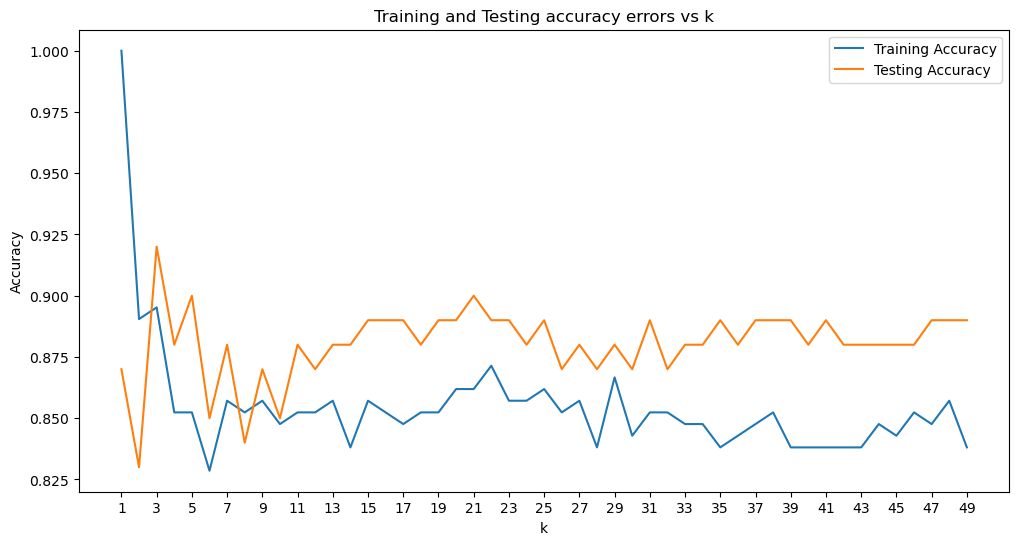

In [8]:
tr_accuracy = []
te_accuracy = []

for k in range(49, 0, -1):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

    # train knn classifier
    knn.fit(tr_x, tr_y)

    # calculate training accuracy
    tr_pred_y = knn.predict(tr_x)
    tr_accuracy.append(accuracy_score(tr_y, tr_pred_y))

    # calculate accuracy and add to list
    te_pred_y = knn.predict(te_x)
    te_accuracy.append(accuracy_score(te_y, te_pred_y))

plt.figure(figsize=(12,6))
plt.plot(range(49, 0, -1), tr_accuracy, label='Training Accuracy')
plt.plot(range(49, 0, -1), te_accuracy, label='Testing Accuracy')
plt.xlabel('k')
plt.xticks(range(49, 0, -2))
plt.ylabel('Accuracy')
plt.title('Training and Testing accuracy errors vs k')
plt.legend()
plt.show()

In [9]:
k3_test_accuracy = te_accuracy[2]
k21_test_accuracy = te_accuracy[20]
accuracy_diff = k3_test_accuracy - k21_test_accuracy
print(f'% Accuracy difference: {accuracy_diff * 100}')

% Accuracy difference: 1.0000000000000009


## "k* = 21"

From the graph above we see that odd numbers of k gives us better results than even ones (which makes sense as we are using majority voting). We see that k = 3 gives us our highest test accuracy. However, I am choosing k = 21 as this has a test accuracy that is around 1% less than k = 3, and a higher value of k is likely going to be more robust to overfitting.

Now we will calculate the confusion matrix, true positive rate, true negative rate, precision and F1 score at k = 21

In [10]:
knn = KNeighborsClassifier(n_neighbors=21, metric='euclidean')

# train knn classifier
knn.fit(tr_x, tr_y)

# get prediction
te_pred_y = knn.predict(te_x)

# get confusion matrix
cmatrix = confusion_matrix(te_y, te_pred_y)
print(f'confusion matrix: \n {cmatrix}')

# get true pos rate and true neg rate
TN, FP, FN, TP = cmatrix.ravel()

TPR = TP / (TP + FN)
print(f'True positive rate: {TPR}')
TNR = TN / (TN + FP)
print(f'True negative rate: {TNR}')

# get precision score
precision = TP / (TP + FP)
print(f'Precision: {precision}')

# get F1 score
F1 = (2 * precision * TPR) / (precision + TPR)
print(f'F1 score: {F1}')

confusion matrix: 
 [[69  1]
 [ 9 21]]
True positive rate: 0.7
True negative rate: 0.9857142857142858
Precision: 0.9545454545454546
F1 score: 0.8076923076923077


#### iii. Learning Curve

[1, 1, 1, 11, 16, 21, 26, 26, 36, 6, 6, 11, 11, 1, 21, 11, 11, 16, 16, 16, 21]
Minimum test error across all N and all k: 0.09999999999999998
k*: 21


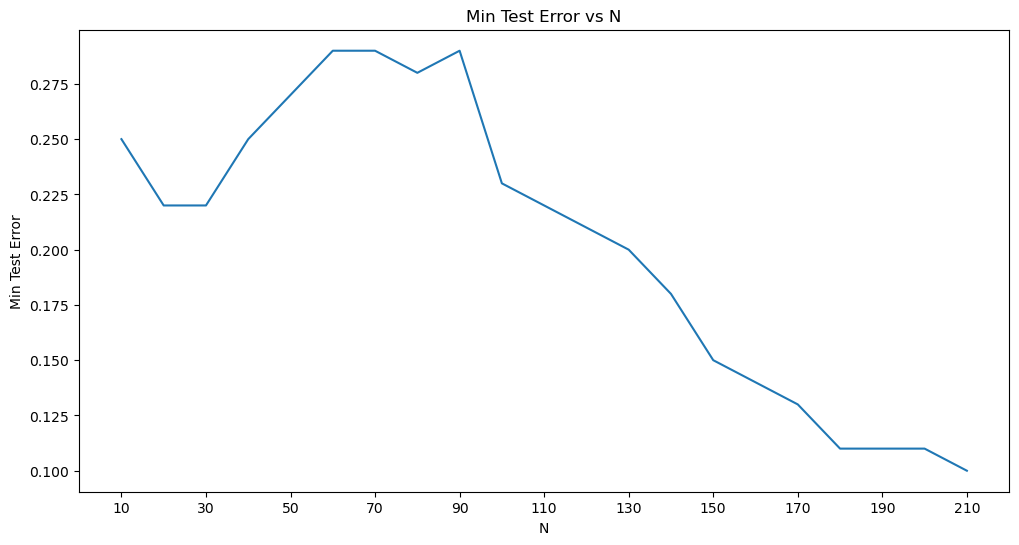

In [11]:
min_te_err = []
min_k = []
# loop through the values of N (training set size)
for N in range(10, 220, 10):
    te_err_by_k = []
    
    # partition training set data, keeping the testing set constant at 100 rows
    class0_N = N // 3
    class1_N = N - (N // 3)
    tr_df_N = pd.concat([df[df['class'] == 'NO'].head(class0_N), \
                       df[df['class'] == 'AB'].head(class1_N)], ignore_index=True)    
    tr_x_N = tr_df_N.drop('class', axis=1).to_numpy()
    tr_y_N = tr_df_N['class'].to_numpy()
    
    for k in range(1, N, 5):
        # we want to select 196 as our largest value of k
        if k > 196:
            break

        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

        # train knn classifier
        knn.fit(tr_x_N, tr_y_N)

        # calculate test errors for each k
        te_pred_y = knn.predict(te_x)
        te_err_by_k.append(1 - accuracy_score(te_y, te_pred_y))
    
    # get the minimum test error for all values of k and append to list that we will plot
    min_te_err.append(np.min(np.array(te_err_by_k)))
    min_k.append(np.argmin(np.array(te_err_by_k)) * 5 + 1)

print(min_k)
min_te_err_by_N = np.min(np.array(min_te_err))
min_k_by_N = min_k[np.argmin(np.array(min_te_err))]
print(f'Minimum test error across all N and all k: {min_te_err_by_N}')
print(f'k*: {min_k_by_N}')
    
plt.figure(figsize=(12,6))
plt.plot(range(10, 220, 10), min_te_err)
plt.xlabel('N')
plt.xticks(range(10, 220, 20))
plt.ylabel('Min Test Error')
plt.title('Min Test Error vs N')
plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [12]:
min_te_err = []
min_err, min_k = float('inf'), -1

for k in range(1, 200, 5):
        
        knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')

        # train knn classifier
        knn.fit(tr_x, tr_y)

        # calculate test errors for each k
        te_pred_y = knn.predict(te_x)
        te_err = 1 - accuracy_score(te_y, te_pred_y)

        if te_err < min_err:
            min_err = te_err
            min_k = k

# add min test error to our table
min_te_err.append(min_err)

print(f'Min test error: {min_err}')
print(f'k*: {min_k}')

Min test error: 0.10999999999999999
k*: 11


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [13]:
exponents = np.arange(0.1, 1.1, 0.1)
min_err, min_exp, min_k = float('inf'), -1, -1

for exp in exponents:
    for k in range(1, 200, 5):
        te_err_by_k = []

        p = 10 ** exp
        knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=p)

        # train knn classifier
        knn.fit(tr_x, tr_y)

        # calculate test errors for each k
        te_pred_y = knn.predict(te_x)
        te_err = 1 - accuracy_score(te_y, te_pred_y)

        # Update the best k, best exp, and best_err if we find a smaller error
        if te_err < min_err:
            min_err = te_err
            min_exp = exp
            min_k = k

# add min test error to our table
min_te_err.append(min_err)

print(f'Min test error: {min_err}')
print(f'Min log p: {min_exp}')
print(f'Min k: {min_k}')

Min test error: 0.09999999999999998
Min log p: 0.2
Min k: 21


##### C. Chebyshev Distance With p -> infinity.

In [14]:
min_err, min_k = float('inf'), -1

for k in range(1, 200, 5):
        
        knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')

        # train knn classifier
        knn.fit(tr_x, tr_y)

        # calculate test errors for each k
        te_pred_y = knn.predict(te_x)
        te_err = 1 - accuracy_score(te_y, te_pred_y)

        if te_err < min_err:
            min_err = te_err
            min_k = k

# add min test error to our table
min_te_err.append(min_err)

print(f'Min test error: {min_err}')
print(f'k*: {min_k}')

Min test error: 0.10999999999999999
k*: 21


#### ii. Mahalanobis Distance.

In [15]:
# Calculate the covariance matrix of the training data
covar_matrix = np.cov(tr_x, rowvar=False)

# Calculate the inverse of this
inv_covar_matrix = pinv(covar_matrix)

min_err, min_k = float('inf'), -1

for k in range(1, 200, 5):
        
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': inv_covar_matrix})

    # train knn classifier
    knn.fit(tr_x, tr_y)

    # calculate test errors for each k
    te_pred_y = knn.predict(te_x)
    te_err = 1 - accuracy_score(te_y, te_pred_y)

    if te_err < min_err:
        min_err = te_err
        min_k = k

# add min test error to our table
min_te_err.append(min_err)

print(f'Min test error: {min_err}')
print(f'k*: {min_k}')

Min test error: 0.17000000000000004
k*: 1


## Putting the results into a table

In [16]:
table = PrettyTable()

table.field_names = ['Metric', 'Min Test Error']
table.add_row(['Manhattan', min_te_err[0]])
table.add_row(['Minkowski', min_te_err[1]])
table.add_row(['Chebyshev', min_te_err[2]])
table.add_row(['Mahalanobis', min_te_err[3]])

print(table)

+-------------+---------------------+
|    Metric   |    Min Test Error   |
+-------------+---------------------+
|  Manhattan  | 0.10999999999999999 |
|  Minkowski  | 0.09999999999999998 |
|  Chebyshev  | 0.10999999999999999 |
| Mahalanobis | 0.17000000000000004 |
+-------------+---------------------+


### (e) Weighted Decision

In [17]:
min_te_err = []
metrics = ['euclidean', 'manhattan', 'chebyshev']

# Find min error for each metric
for metric in metrics:
    te_err_by_k = []
    for k in range(1, 200, 5):
            
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')
    
        # train knn classifier
        knn.fit(tr_x, tr_y)

        # calculate test errors for each k
        te_pred_y = knn.predict(te_x)
        te_err_by_k.append(1 - accuracy_score(te_y, te_pred_y))

    # get the minimum test error for all values of k
    min_te_err.append(np.min(np.array(te_err_by_k)))

table = PrettyTable()
table.field_names = ['Metric', 'Min Test Error']
table.add_row(['Euclidean', min_te_err[0]])
table.add_row(['Manhattan', min_te_err[1]])
table.add_row(['Chebyshev', min_te_err[2]])

print(table)

+-----------+---------------------+
|   Metric  |    Min Test Error   |
+-----------+---------------------+
| Euclidean | 0.09999999999999998 |
| Manhattan | 0.09999999999999998 |
| Chebyshev | 0.10999999999999999 |
+-----------+---------------------+


### (f) Training Error Rate

With the Euclidean distance metric and k = 1, I achieved a training error rate of 0. This is because when applying my model to the training set, we are only conisdering one data point in our majority voting, and for each data point the closest data point will always be itself as it has a Euclidean distance of 0 to itself. Therefore, it will always assign such data points to the correct class.